# GRAFICI per il progetto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# importiamo il df relativo alle chiamate al 1522 IN ITALIA
# in particolare ci concentreremo su tipologie precise di motivi della chiamata 
utenti = pd.read_csv('../dataframe/Istat/Utenti1522.csv')
#eliminiamo alcune colonne che al non ci interessano per la creazione del grafico
utenti = utenti.drop(columns=['ITTER107','Territorio','TIPO_DATO_1522','MOTIVOPS1','Sesso','Nazionalità','Value','Flag Codes','Flags','TIME'])
#eliminiamo i dati riguardanti utenti non italiani
sessoMF = utenti['SEXISTAT1'] != 'T'
utentiITA = utenti['ISO'] == 'IT'
utenti = utenti[sessoMF & utentiITA]
utenti

FileNotFoundError: [Errno 2] No such file or directory: '../dataframe/Istat/Utenti1522.csv'

In [3]:
# selezioniamo il tipo di chiamata che ci interessa
# visualizziamo tutti i motivi delle chiamate
utenti['Motivi della chiamata'].unique()

NameError: name 'utenti' is not defined

In [4]:
# selezioniamo le chiamate di aiuto
# Specifico i tipi di violenza che voglio selezionare
tipi_di_violenza_da_selezionare = ['richiesta di aiuto vittima di stalking', 'richiesta di aiuto vittima di violenza','richiesta di aiuto per discriminazione','segnalazione di un caso di violenza','emergenza']
tipi_di_violenza_da_selezionare

['richiesta di aiuto vittima di stalking',
 'richiesta di aiuto vittima di violenza',
 'richiesta di aiuto per discriminazione',
 'segnalazione di un caso di violenza',
 'emergenza']

In [5]:
# prendo solo le tuple con il motivo di chiamata che mi interessa
utenti = utenti[utenti['Motivi della chiamata'].isin(tipi_di_violenza_da_selezionare)]
utenti

NameError: name 'utenti' is not defined

In [6]:
# creiamo una tabelle delle frequenze assolute
pd.crosstab(index=utenti['Motivi della chiamata'], columns=utenti['SEXISTAT1'],colnames=[''])

NameError: name 'utenti' is not defined

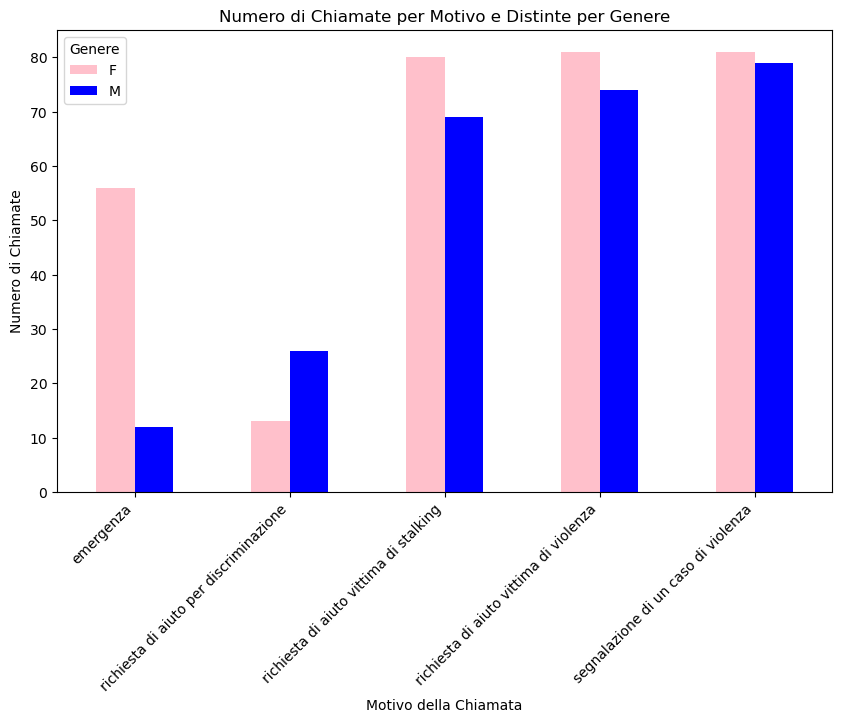

In [184]:
# produciamo un grafico avente nelle ascisse il motivo della chiamata e sulle ordinate il numero di chiamate
# distinguendo da maschi e femmine
medie = utenti.copy()
# Conta il numero di chiamate per ogni combinazione di motivo e genere
df_counts = medie.groupby(['Motivi della chiamata', 'SEXISTAT1']).size().unstack()

colors = {'M': 'blue', 'F': 'pink'}

# Creazione del grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta il grafico a barre con barre separate per maschi e femmine
df_counts.plot(kind='bar', color=[colors[col] for col in df_counts.columns], ax=ax)

# Aggiunta delle etichette
plt.xlabel('Motivo della Chiamata')
plt.ylabel('Numero di Chiamate')
plt.title('Numero di Chiamate per Motivo e Distinte per Genere')

# Modifica della legenda
plt.legend(title='Genere', loc='upper left')
# Ruoto le etichette sull'asse x di 45 gradi
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.show()

In [32]:
# analizziamo un altro dataframe in cui ho dati relativi al tipo di violenza subita dalla vittima
df_violenza = pd.read_csv('../dataframe/Istat/TipoViolenza.csv')
df_violenza

,ITTER107,Territorio,TIPO_DATO_1522,Tipo dato,SEXISTAT1,Sesso,ISO,Nazionalità,TIPOVIOLENZA,Caratteristiche della violenza,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,USERS,utenti del 1522,F,femmine,NRP,Non Indicato,ALL,tutte le voci,2022,2022,3,NaN,NaN
1,IT,Italia,USERS,utenti del 1522,F,femmine,NRP,Non Indicato,UNAV,non disponibile,2022,2022,3,NaN,NaN
2,IT,Italia,USERS,utenti del 1522,T,totale,NRP,Non Indicato,ALL,tutte le voci,2022,2022,18,NaN,NaN
3,IT,Italia,USERS,utenti del 1522,T,totale,NRP,Non Indicato,UNAV,non disponibile,2022,2022,18,NaN,NaN
4,IT,Italia,USERS,utenti del 1522,NRP,non indicato,NRP,Non Indicato,ALL,tutte le voci,2022,2022,15,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,ITE2,Umbria,USERS,utenti del 1522,M,maschi,WRL_X_ITA,Paesi esteri,SEXVIOL,violenza sessuale,2022,2022,1,NaN,NaN
1728,ITF6,Calabria,USERS,utenti del 1522,F,femmine,WRL_X_ITA,Paesi esteri,ECON_VIOL,violenza economica,2022,2022,1,NaN,NaN
1729,ITF6,Calabria,USERS,utenti del 1522,T,totale,WRL_X_ITA,Paesi esteri,ECON_VIOL,violenza economica,2022,2022,1,NaN,NaN
1730,ITG,Isole,USERS,utenti del 1522,M,maschi,WRL_X_ITA,Paesi esteri,THREATS,minacce,2022,2022,1,NaN,NaN


In [33]:
#eliminiamo alcune colonne che al non ci interessano per la creazione del grafico
df_violenza = df_violenza.drop(columns=['ITTER107','Territorio','TIPO_DATO_1522','TIPOVIOLENZA','Sesso','Nazionalità','Value','Flag Codes','Flags','TIME'])
#eliminiamo i dati riguardanti utenti non italiani
sessoMF = df_violenza['SEXISTAT1'] != 'T'
utentiITA = df_violenza['ISO'] == 'IT'
df_violenza = df_violenza[sessoMF & utentiITA]
df_violenza

,Tipo dato,SEXISTAT1,ISO,Caratteristiche della violenza,Seleziona periodo
12,utenti del 1522,M,IT,violenza fisica,2022
13,utenti del 1522,M,IT,violenza sessuale,2022
14,utenti del 1522,M,IT,violenza psicologica,2022
15,utenti del 1522,M,IT,violenza economica,2022
16,utenti del 1522,M,IT,tutte le voci,2022
...,...,...,...,...,...
1713,utenti del 1522,M,IT,tratta,2022
1714,utenti del 1522,M,IT,tratta,2022
1715,utenti del 1522,M,IT,violenza economica,2022
1717,utenti del 1522,M,IT,tratta,2022


In [34]:
# tipi di violenza
df_violenza['Caratteristiche della violenza'].unique()

array(['violenza fisica ', 'violenza sessuale', 'violenza psicologica',
       'violenza economica', 'tutte le voci', 'minacce', 'mobbing',
       'non risponde', 'non disponibile', 'tratta'], dtype=object)

In [35]:
# selezioniamo i tipi di violenza validi
# Specifico i tipi di violenza che voglio selezionare
tipi_di_violenza = ['violenza fisica', 'violenza sessuale','violenza psicologica','violenza economica','minacce','mobbing']
tipi_di_violenza

['violenza fisica',
 'violenza sessuale',
 'violenza psicologica',
 'violenza economica',
 'minacce',
 'mobbing']

In [37]:
# prendo solo le tuple con il tipo di violenza che mi interessa
df_violenza = df_violenza[df_violenza['Caratteristiche della violenza'].isin(tipi_di_violenza)]
df_violenza

,Tipo dato,SEXISTAT1,ISO,Caratteristiche della violenza,Seleziona periodo
13,utenti del 1522,M,IT,violenza sessuale,2022
14,utenti del 1522,M,IT,violenza psicologica,2022
15,utenti del 1522,M,IT,violenza economica,2022
17,utenti del 1522,M,IT,minacce,2022
18,utenti del 1522,M,IT,mobbing,2022
...,...,...,...,...,...
625,utenti del 1522,F,IT,violenza psicologica,2022
626,utenti del 1522,F,IT,violenza economica,2022
628,utenti del 1522,F,IT,minacce,2022
629,utenti del 1522,F,IT,mobbing,2022


In [38]:
# creiamo una tabelle delle frequenze assolute
pd.crosstab(index=df_violenza['Caratteristiche della violenza'], columns=df_violenza['SEXISTAT1'],colnames=[''])

,F,M
Caratteristiche della violenza,,
minacce,27,18
mobbing,20,2
violenza economica,26,9
violenza psicologica,27,23
violenza sessuale,27,20


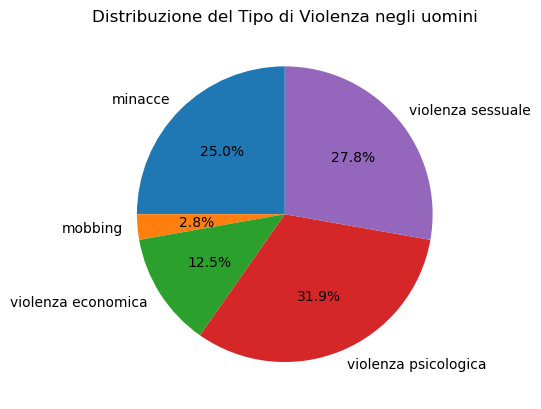

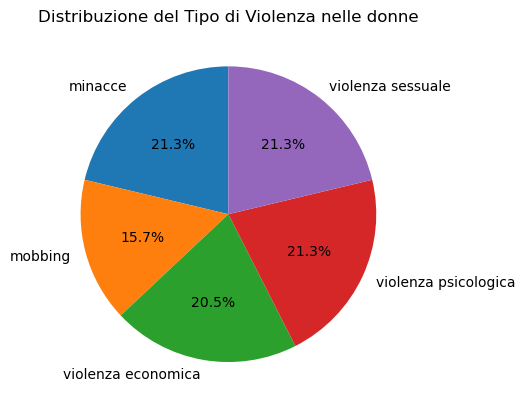

In [46]:
# Conta il numero di casi per ogni combinazione di tipo di violenza e genere
df_counts = df_violenza.groupby(['Caratteristiche della violenza', 'SEXISTAT1']).size().unstack()

# Creazione del primo grafico a torta per il genere 'M'
fig, ax1 = plt.subplots()
df_counts['M'].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax1)
ax1.set_title('Distribuzione del Tipo di Violenza negli uomini')
ax1.set_ylabel('')

# Creazione del secondo grafico a torta per il genere 'F'
fig, ax2 = plt.subplots()
df_counts['F'].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax2)
ax2.set_title('Distribuzione del Tipo di Violenza nelle donne')
ax2.set_ylabel('')

# Mostra i grafici
plt.show()

In [65]:
# analizziamo un altro dataframe in cui ho dati relativi al tipo di violenza subita dalla vittima
df_dettagli = pd.read_excel('../dataframe/Istat/usati/attualePartner.xlsx')
df_dettagli = df_dettagli.drop(df_dettagli.index[[0,1,2,3,4,5]])
df_dettagli = df_dettagli.rename(columns={'Unnamed: 1':'arco_di_vita','Unnamed: 2': 'ultimi_5_anni','Unnamed: 3':'due_mesi'})

/Users/viola/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [66]:
df_dettagli = df_dettagli.drop(df_dettagli.index[[0]])
df_dettagli

,Dettaglio tipo di violenza e tipo di autore,arco_di_vita,ultimi_5_anni,due_mesi
7,Violenza fisica o sessuale,31.5,11.3,4.5
8,Violenza fisica,20.2,7,2.7
9,Minacciate di essere colpite fisicamente,12.3,4.1,1.6
10,Colpite con un oggetto o cui hanno tirato qual...,6.1,1.8,0.7
11,"Spinte, afferrate, strattonate, cui hanno stor...",11.5,3.9,1.4
12,"Schiaffeggiate, prese a calci, a pugni o morse",7.3,2.1,0.6
13,"Che hanno tentato di strangolare, soffocare, u...",1.5,0.4,0.1
14,Contro cui hanno usato o minacciato di usare u...,1.7,0.4,0.1
15,Che hanno subito violenza fisica in un modo di...,1.2,0.3,0.1
16,Violenza sessuale,21,6.3,2.2


In [67]:
df_dettagli = df_dettagli.rename(columns={'Dettaglio tipo di violenza e tipo di autore  ':'TipoViolenza'})

In [68]:
df_dettagli.columns

Index(['TipoViolenza', 'arco_di_vita', 'ultimi_5_anni', 'due_mesi'], dtype='object')

In [69]:
df_dettagli

,TipoViolenza,arco_di_vita,ultimi_5_anni,due_mesi
7,Violenza fisica o sessuale,31.5,11.3,4.5
8,Violenza fisica,20.2,7,2.7
9,Minacciate di essere colpite fisicamente,12.3,4.1,1.6
10,Colpite con un oggetto o cui hanno tirato qual...,6.1,1.8,0.7
11,"Spinte, afferrate, strattonate, cui hanno stor...",11.5,3.9,1.4
12,"Schiaffeggiate, prese a calci, a pugni o morse",7.3,2.1,0.6
13,"Che hanno tentato di strangolare, soffocare, u...",1.5,0.4,0.1
14,Contro cui hanno usato o minacciato di usare u...,1.7,0.4,0.1
15,Che hanno subito violenza fisica in un modo di...,1.2,0.3,0.1
16,Violenza sessuale,21,6.3,2.2


In [70]:
df_dettagli = df_dettagli.rename(columns={'Dettaglio tipo di violenza e tipo di autore  ':'TipoViolenza'})

In [77]:
df_dettagli = df_dettagli.drop(df_dettagli.index[[1,9,10]])

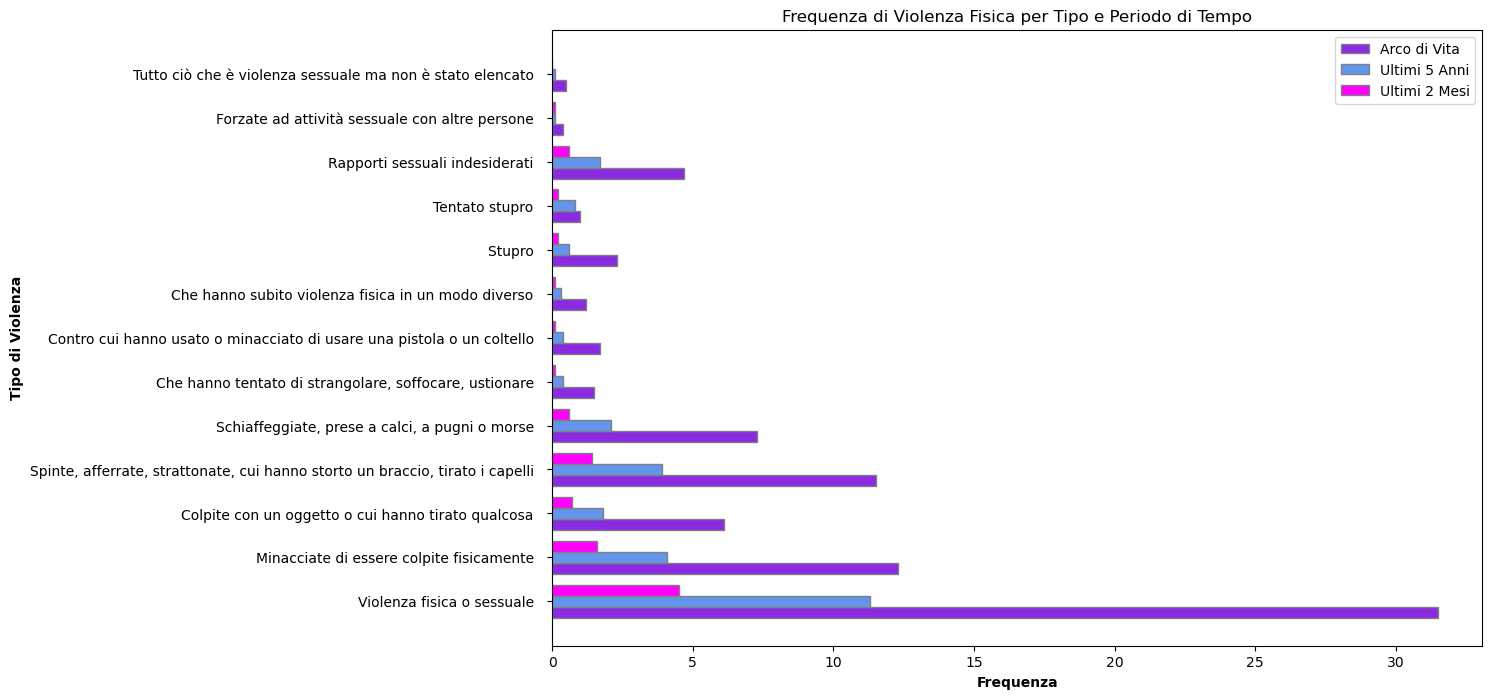

In [89]:
# Larghezza delle barre
barHeight = 0.25



# Posizione delle barre per ciascun tipo di violenza
r1 = np.arange(len(df_dettagli.TipoViolenza))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Creazione del grafico a barre
plt.figure(figsize=(12, 8))

plt.barh(r1, df_dettagli['arco_di_vita'], color='#8a2be2', height=barHeight, edgecolor='grey', label='Arco di Vita')
plt.barh(r2, df_dettagli['ultimi_5_anni'], color='#6495ed', height=barHeight, edgecolor='grey', label='Ultimi 5 Anni')
plt.barh(r3, df_dettagli['due_mesi'], color='#ff00ff', height=barHeight, edgecolor='grey', label='Ultimi 2 Mesi')

# Personalizzazione del grafico
plt.ylabel('Tipo di Violenza', fontweight='bold')
plt.xlabel('Frequenza', fontweight='bold')
plt.yticks([r + barHeight for r in range(len(df_dettagli['TipoViolenza']))], df_dettagli['TipoViolenza'])
plt.title('Frequenza di Violenza Fisica per Tipo e Periodo di Tempo')
plt.legend()

# Mostra il grafico
plt.show()


In [36]:
# analizziamo un altro dataframe in cui ho dati relativi all'aggressore della vittima
df_aggressore = pd.read_excel('../dataframe/Istat/usati/attualePartner.xlsx')
#eliminiamo cioò che non ci interessa
df_aggressore = df_aggressore.drop(df_aggressore.index[[0,1,2,3,4,5,6]])
df_aggressore = df_aggressore.rename(columns={'Unnamed: 1':'arco di vita','Unnamed: 2': 'ultimi 5 anni','Unnamed: 3':'2 mesi'})

#visualizziamo 
df_aggressore

/Users/viola/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Dettaglio tipo di violenza e tipo di autore,arco di vita,ultimi 5 anni,2 mesi
7,Violenza fisica o sessuale,31.5,11.3,4.5
8,Violenza fisica,20.2,7,2.7
9,Minacciate di essere colpite fisicamente,12.3,4.1,1.6
10,Colpite con un oggetto o cui hanno tirato qual...,6.1,1.8,0.7
11,"Spinte, afferrate, strattonate, cui hanno stor...",11.5,3.9,1.4
12,"Schiaffeggiate, prese a calci, a pugni o morse",7.3,2.1,0.6
13,"Che hanno tentato di strangolare, soffocare, u...",1.5,0.4,0.1
14,Contro cui hanno usato o minacciato di usare u...,1.7,0.4,0.1
15,Che hanno subito violenza fisica in un modo di...,1.2,0.3,0.1
16,Violenza sessuale,21,6.3,2.2


In [37]:
df_aggressore = df_aggressore.rename(columns={'Dettaglio tipo di violenza e tipo di autore  ':'TipoViolenza'})
df_aggressore

,TipoViolenza,arco di vita,ultimi 5 anni,2 mesi
7,Violenza fisica o sessuale,31.5,11.3,4.5
8,Violenza fisica,20.2,7,2.7
9,Minacciate di essere colpite fisicamente,12.3,4.1,1.6
10,Colpite con un oggetto o cui hanno tirato qual...,6.1,1.8,0.7
11,"Spinte, afferrate, strattonate, cui hanno stor...",11.5,3.9,1.4
12,"Schiaffeggiate, prese a calci, a pugni o morse",7.3,2.1,0.6
13,"Che hanno tentato di strangolare, soffocare, u...",1.5,0.4,0.1
14,Contro cui hanno usato o minacciato di usare u...,1.7,0.4,0.1
15,Che hanno subito violenza fisica in un modo di...,1.2,0.3,0.1
16,Violenza sessuale,21,6.3,2.2


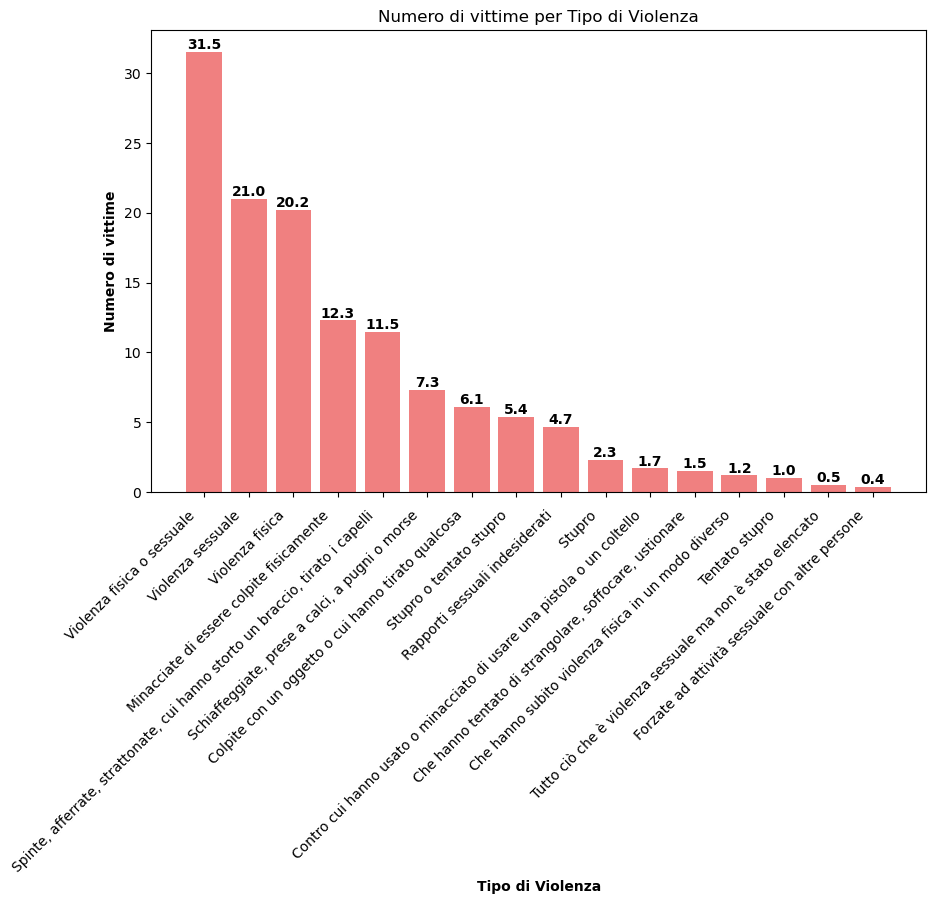

In [38]:
# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
# Ordina i dati in modo decrescente
sorted_data = sorted(zip(df_aggressore['TipoViolenza'],  df_aggressore['arco di vita']), key=lambda x: x[1], reverse=True)
df_aggressore['TipoViolenza'],  df_aggressore['arco di vita'] = zip(*sorted_data)
bars = plt.bar(df_aggressore['TipoViolenza'], df_aggressore['arco di vita'], color=[ 'lightcoral'])

# Personalizzazione del grafico
plt.xlabel('Tipo di Violenza', fontweight='bold')
plt.ylabel('Numero di vittime', fontweight='bold')
plt.title('Numero di vittime per Tipo di Violenza')

# Ruota le etichette sull'asse delle ascisse di 45 gradi
plt.xticks(rotation=45, ha='right')

# Aggiunge etichette sopra le barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', color='black', fontweight='bold')

# Mostra il grafico
plt.show()

In [114]:
# analizziamo un altro dataframe in cui ho dati relativi all'aggressore della vittima
df_exP = pd.read_excel('../dataframe/Istat/exP.xlsx')
#eliminiamo cioò che non ci interessa
df_exP = df_exP.drop(df_exP.index[[0,1,2,3,4,5,6]])
df_exP = df_exP.rename(columns={'Unnamed: 1':'arco di vita','Unnamed: 2': 'ultimi 5 anni','Unnamed: 3':'2 mesi'})

#visualizziamo 
df_exP

/Users/viola/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Dettaglio tipo di violenza e tipo di autore,arco di vita,ultimi 5 anni,2 mesi
7,Violenza fisica o sessuale,18.9,5,1.3
8,Violenza fisica,16.4,4.2,1.2
9,Minacciate di essere colpite fisicamente,9.6,2.5,0.8
10,Colpite con un oggetto o cui hanno tirato qual...,5.4,1.3,0.4
11,"Spinte, afferrate, strattonate, cui hanno stor...",11.4,2.8,0.7
12,"Schiaffeggiate, prese a calci, a pugni o morse",8.9,2.2,0.4
13,"Che hanno tentato di strangolare, soffocare, u...",2,0.4,0.1
14,Contro cui hanno usato o minacciato di usare u...,1.5,0.2,0
15,Che hanno subito violenza fisica in un modo di...,0.5,0.1,0
16,Violenza sessuale,8.3,2.1,0.3


In [115]:
df_exP = df_exP.rename(columns={'Dettaglio tipo di violenza e tipo di autore  ':'TipoViolenza'})
df_exP

,TipoViolenza,arco di vita,ultimi 5 anni,2 mesi
7,Violenza fisica o sessuale,18.9,5,1.3
8,Violenza fisica,16.4,4.2,1.2
9,Minacciate di essere colpite fisicamente,9.6,2.5,0.8
10,Colpite con un oggetto o cui hanno tirato qual...,5.4,1.3,0.4
11,"Spinte, afferrate, strattonate, cui hanno stor...",11.4,2.8,0.7
12,"Schiaffeggiate, prese a calci, a pugni o morse",8.9,2.2,0.4
13,"Che hanno tentato di strangolare, soffocare, u...",2,0.4,0.1
14,Contro cui hanno usato o minacciato di usare u...,1.5,0.2,0
15,Che hanno subito violenza fisica in un modo di...,0.5,0.1,0
16,Violenza sessuale,8.3,2.1,0.3


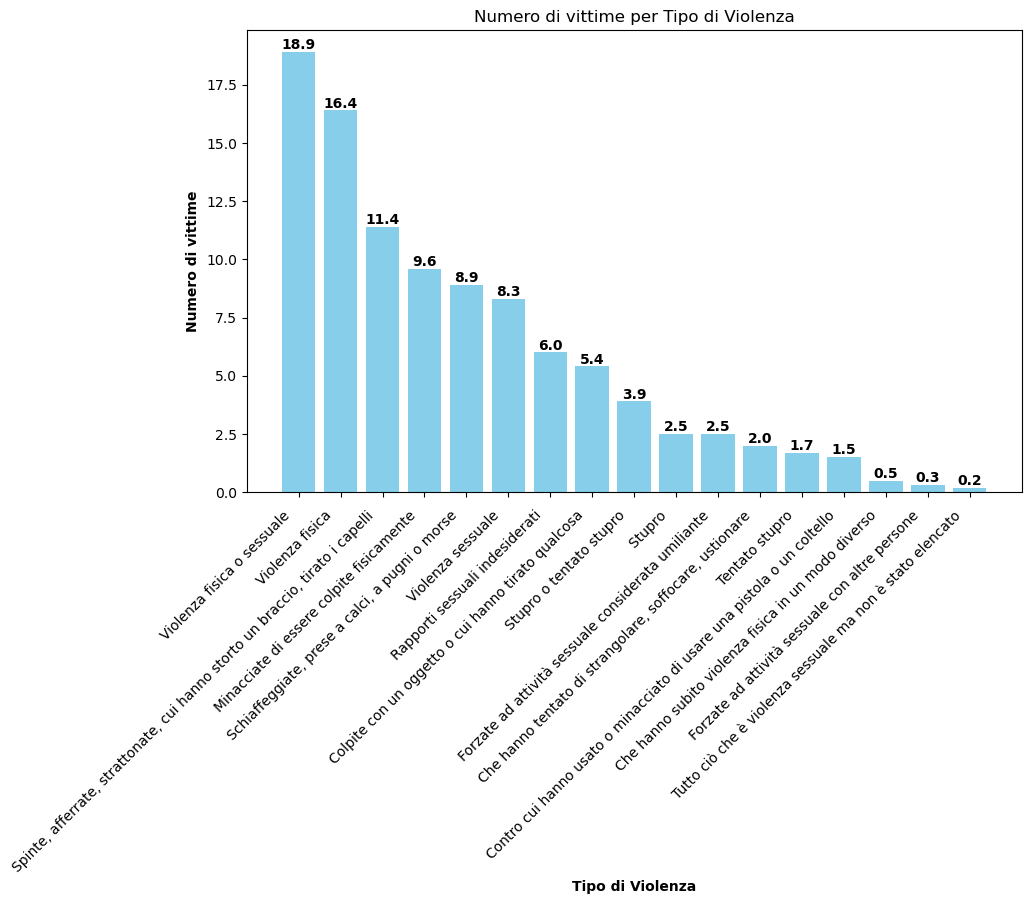

In [116]:
# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
# Ordina i dati in modo decrescente
sorted_data = sorted(zip(df_exP['TipoViolenza'],  df_exP['arco di vita']), key=lambda x: x[1], reverse=True)
df_exP['TipoViolenza'],  df_exP['arco di vita'] = zip(*sorted_data)
bars = plt.bar(df_exP['TipoViolenza'], df_exP['arco di vita'], color=['skyblue'])

# Personalizzazione del grafico
plt.xlabel('Tipo di Violenza', fontweight='bold')
plt.ylabel('Numero di vittime', fontweight='bold')
plt.title('Numero di vittime per Tipo di Violenza')

# Ruota le etichette sull'asse delle ascisse di 45 gradi
plt.xticks(rotation=45, ha='right')

# Aggiunge etichette sopra le barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', color='black', fontweight='bold')

# Mostra il grafico
plt.show()

In [117]:
# analizziamo un altro dataframe in cui ho dati relativi all'aggressore della vittima
df_conosciutaNP = pd.read_excel('../dataframe/Istat/conosciutaNP.xlsx')
#eliminiamo cioò che non ci interessa
df_conosciutaNP = df_conosciutaNP.drop(df_conosciutaNP.index[[0,1,2,3,4,5,6]])
df_conosciutaNP = df_conosciutaNP.rename(columns={'Unnamed: 1':'arco di vita','Unnamed: 2': 'ultimi 5 anni','Unnamed: 3':'2 mesi'})

#visualizziamo 
df_conosciutaNP

/Users/viola/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Dettaglio tipo di violenza e tipo di autore,arco di vita,ultimi 5 anni,2 mesi
7,Violenza fisica o sessuale,13,3.8,1.1
8,Violenza fisica o sessuale senza molestie,9.5,2.8,0.9
9,Violenza fisica,8.1,2.4,0.8
10,Minacciate di essere colpite fisicamente,4.7,1.3,0.5
11,Colpite con un oggetto o cui hanno tirato qual...,2.1,0.6,0.2
12,"Spinte, afferrate, strattonate, cui hanno stor...",3.2,1.1,0.3
13,"Schiaffeggiate, prese a calci, a pugni o morse",1.6,0.5,0.2
14,"Che hanno tentato di strangolare, soffocare, u...",0.2,0.1,0
15,Contro cui hanno usato o minacciato di usare u...,0.4,0.1,0
16,Che hanno subito violenza fisica in un modo di...,0.5,0.1,0


In [118]:
df_conosciutaNP = df_conosciutaNP.rename(columns={'Dettaglio tipo di violenza e tipo di autore  ':'TipoViolenza'})
df_conosciutaNP

,TipoViolenza,arco di vita,ultimi 5 anni,2 mesi
7,Violenza fisica o sessuale,13,3.8,1.1
8,Violenza fisica o sessuale senza molestie,9.5,2.8,0.9
9,Violenza fisica,8.1,2.4,0.8
10,Minacciate di essere colpite fisicamente,4.7,1.3,0.5
11,Colpite con un oggetto o cui hanno tirato qual...,2.1,0.6,0.2
12,"Spinte, afferrate, strattonate, cui hanno stor...",3.2,1.1,0.3
13,"Schiaffeggiate, prese a calci, a pugni o morse",1.6,0.5,0.2
14,"Che hanno tentato di strangolare, soffocare, u...",0.2,0.1,0
15,Contro cui hanno usato o minacciato di usare u...,0.4,0.1,0
16,Che hanno subito violenza fisica in un modo di...,0.5,0.1,0


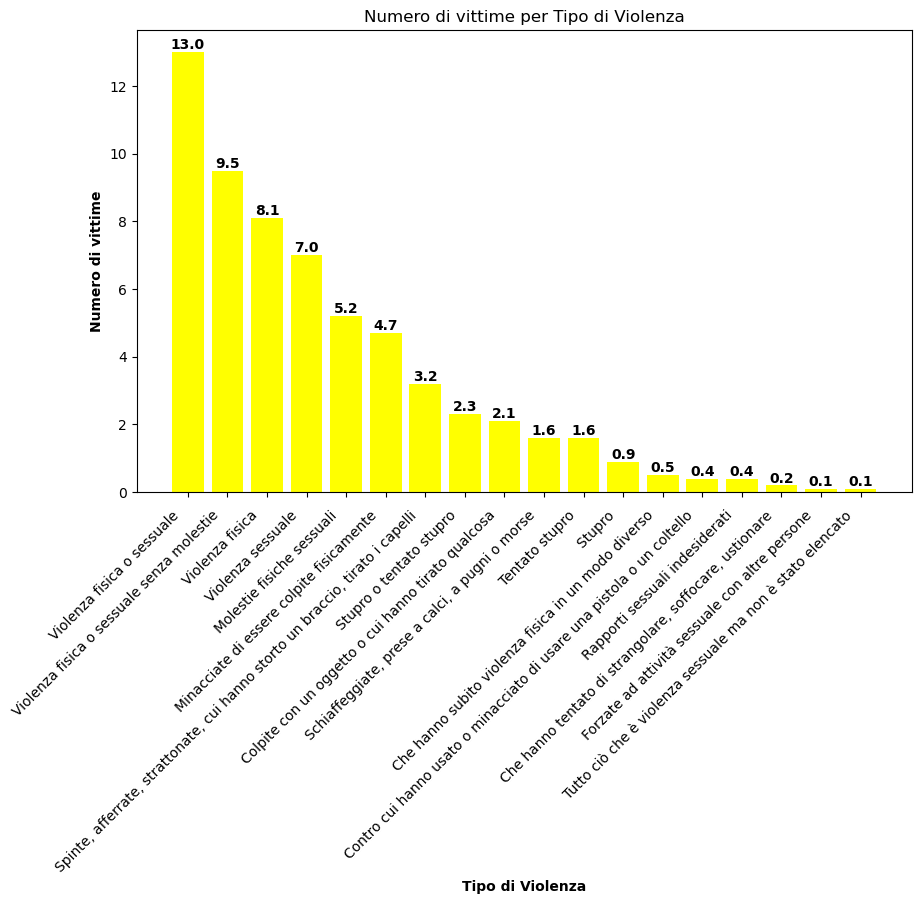

In [119]:
# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
# Ordina i dati in modo decrescente
sorted_data = sorted(zip(df_conosciutaNP['TipoViolenza'],  df_conosciutaNP['arco di vita']), key=lambda x: x[1], reverse=True)
df_conosciutaNP['TipoViolenza'],  df_conosciutaNP['arco di vita'] = zip(*sorted_data)
bars = plt.bar(df_conosciutaNP['TipoViolenza'], df_conosciutaNP['arco di vita'], color=['yellow'])

# Personalizzazione del grafico
plt.xlabel('Tipo di Violenza', fontweight='bold')
plt.ylabel('Numero di vittime', fontweight='bold')
plt.title('Numero di vittime per Tipo di Violenza')

# Ruota le etichette sull'asse delle ascisse di 45 gradi
plt.xticks(rotation=45, ha='right')

# Aggiunge etichette sopra le barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', color='black', fontweight='bold')

# Mostra il grafico
plt.show()

In [124]:
# analizziamo un altro dataframe in cui ho dati relativi all'aggressore della vittima
df_sconosciuta = pd.read_excel('../dataframe/Istat/sconosciuto.xlsx')
#eliminiamo cioò che non ci interessa
df_sconosciuta = df_sconosciuta.drop(df_sconosciuta.index[[0,1,2,3,4,5,6]])
df_sconosciuta = df_sconosciuta.rename(columns={'Unnamed: 1':'arco di vita','Unnamed: 2': 'ultimi 5 anni','Unnamed: 3':'2 mesi'})

#visualizziamo 
df_sconosciuta

/Users/viola/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Dettaglio tipo di violenza e tipo di autore,arco di vita,ultimi 5 anni,2 mesi
7,Violenza fisica o sessuale,13.2,4,1.6
8,Violenza fisica o sessuale senza molestie,4.4,1.2,0.5
9,Violenza fisica,3.7,1,0.4
10,Minacciate di essere colpite fisicamente,2,0.5,0.2
11,Colpite con un oggetto o cui hanno tirato qual...,0.4,0.1,0.1
12,"Spinte, afferrate, strattonate, cui hanno stor...",1.3,0.4,0.1
13,"Schiaffeggiate, prese a calci, a pugni o morse",0.3,0.1,0
14,"Che hanno tentato di strangolare, soffocare, u...",0.1,0,0
15,Contro cui hanno usato o minacciato di usare u...,0.4,0.1,0
16,Che hanno subito violenza fisica in un modo di...,0.3,0.1,0.1


In [125]:
df_sconosciuta = df_sconosciuta.rename(columns={'Dettaglio tipo di violenza e tipo di autore  ':'TipoViolenza'})
df_sconosciuta

,TipoViolenza,arco di vita,ultimi 5 anni,2 mesi
7,Violenza fisica o sessuale,13.2,4,1.6
8,Violenza fisica o sessuale senza molestie,4.4,1.2,0.5
9,Violenza fisica,3.7,1,0.4
10,Minacciate di essere colpite fisicamente,2,0.5,0.2
11,Colpite con un oggetto o cui hanno tirato qual...,0.4,0.1,0.1
12,"Spinte, afferrate, strattonate, cui hanno stor...",1.3,0.4,0.1
13,"Schiaffeggiate, prese a calci, a pugni o morse",0.3,0.1,0
14,"Che hanno tentato di strangolare, soffocare, u...",0.1,0,0
15,Contro cui hanno usato o minacciato di usare u...,0.4,0.1,0
16,Che hanno subito violenza fisica in un modo di...,0.3,0.1,0.1


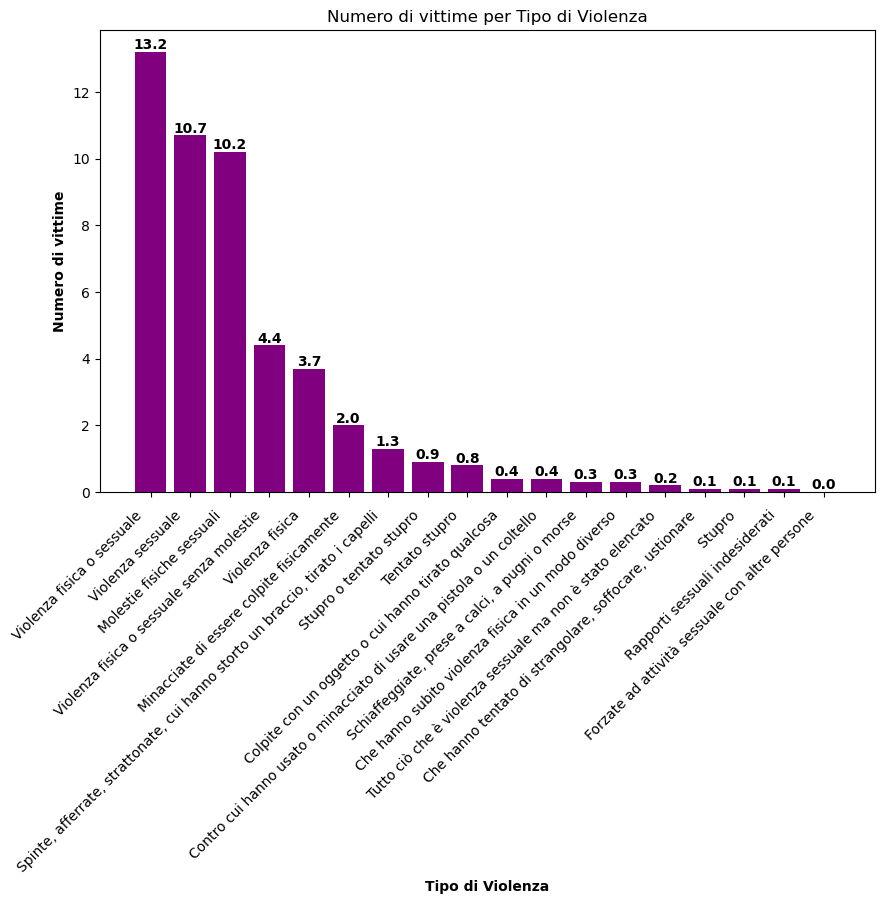

In [126]:
# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
# Ordina i dati in modo decrescente
sorted_data = sorted(zip(df_sconosciuta['TipoViolenza'],  df_sconosciuta['arco di vita']), key=lambda x: x[1], reverse=True)
df_sconosciuta['TipoViolenza'],  df_sconosciuta['arco di vita'] = zip(*sorted_data)
bars = plt.bar(df_sconosciuta['TipoViolenza'], df_sconosciuta['arco di vita'], color=['purple'])

# Personalizzazione del grafico
plt.xlabel('Tipo di Violenza', fontweight='bold')
plt.ylabel('Numero di vittime', fontweight='bold')
plt.title('Numero di vittime per Tipo di Violenza')

# Ruota le etichette sull'asse delle ascisse di 45 gradi
plt.xticks(rotation=45, ha='right')

# Aggiunge etichette sopra le barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', color='black', fontweight='bold')

# Mostra il grafico
plt.show()

In [148]:
# creiamo un nuovo dataset con i dati relativi alle molestie sul lavoro
range_anni = ['15-24','25-34','35-44','45-54','55-65']
vita = [4.1,7.5,9.7,10.5,8.8]
treanni = [2.9,3.1,3.3,2.1,2.3]

dati = {
    'RangeEta' : range_anni,
    'Nel corso della vita':vita,
    'Negli ultimi 3 anni':treanni
}

dataset = pd.DataFrame(dati)
print(dataset)

  RangeEta  Nel corso della vita  Negli ultimi 3 anni
0    15-24                   4.1                  2.9
1    25-34                   7.5                  3.1
2    35-44                   9.7                  3.3
3    45-54                  10.5                  2.1
4    55-65                   8.8                  2.3


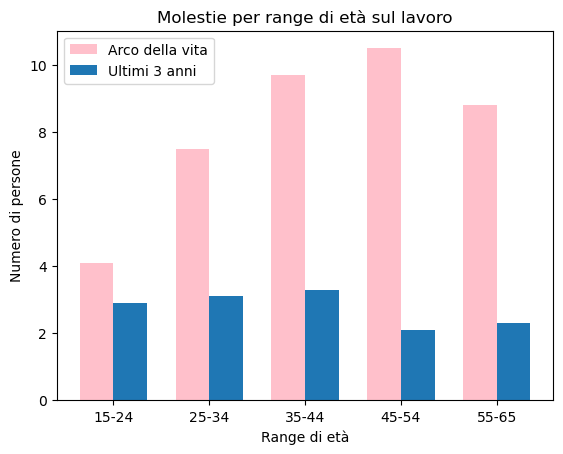

In [151]:
# larghezza delle barre
larghezza_barre = 0.35
# Posizioni delle barre
posizioni = np.arange(len(range_anni))

# Creazione del grafico a barre
plt.bar(posizioni - larghezza_barre/2, vita, larghezza_barre, label='Arco della vita',color='pink')
plt.bar(posizioni + larghezza_barre/2, treanni, larghezza_barre, label='Ultimi 3 anni')

# Etichette e titoli
plt.xlabel('Range di età')
plt.ylabel('Numero di persone')
plt.title('Molestie per range di età sul lavoro')
plt.xticks(posizioni, range_anni)
plt.legend()

# Visualizza il grafico
plt.show()

In [158]:
# un nuovo dataset contentente le conseguenze delle molestie sul lavoro
conseguenze = [ 'processo',
'Ha denunciato colui che la ricattava',
'Ha evitato di andare al lavoro (ad esempio in malattia)',       
'Trasferimento di ufficio/altre penalizzazioni',
'Sottostata alle richieste',
'Continua a lavorare',
'Risolto tutto, ha smesso di lavorare',
'andato via lui/è stato licenziato/trasferito',
'stata licenziata/non è stata assunta/messa in cassa integrazione',
'Nessun esito',
'Ha cambiato lavoro/è andata via/non ha accettato il lavoro']
nella_vita = [0.1,0.5,0.7,1.3,1.4,4.6,5.4,6.5,10.9,20.0,33.8]
ultimi3anni = [0,2.3,0.2,2.1,0,4.7,1.8,1.4,5.1,17.2,32.0]

dati = {
     'Cons':conseguenze,
    'Corso della vita':nella_vita,
    'Ultimi 3 anni':ultimi3anni
}

df = pd.DataFrame(dati)
print(df)

                                                 Cons  Corso della vita  \
0                                            processo               0.1   
1                Ha denunciato colui che la ricattava               0.5   
2   Ha evitato di andare al lavoro (ad esempio in ...               0.7   
3       Trasferimento di ufficio/altre penalizzazioni               1.3   
4                           Sottostata alle richieste               1.4   
5                                 Continua a lavorare               4.6   
6                Risolto tutto, ha smesso di lavorare               5.4   
7        andato via lui/è stato licenziato/trasferito               6.5   
8   stata licenziata/non è stata assunta/messa in ...              10.9   
9                                        Nessun esito              20.0   
10  Ha cambiato lavoro/è andata via/non ha accetta...              33.8   

    Ultimi 3 anni  
0             0.0  
1             2.3  
2             0.2  
3             2.1  

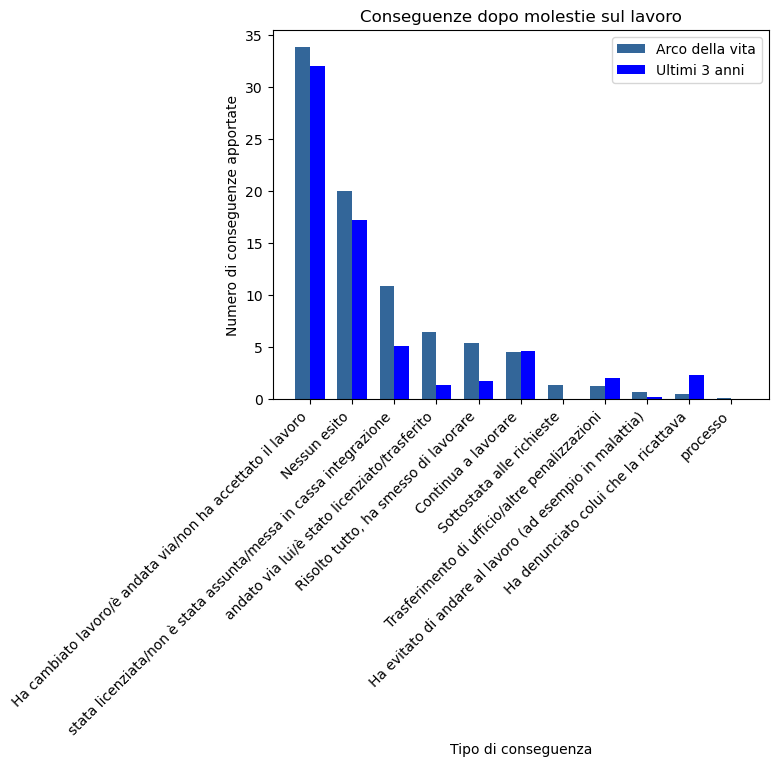

In [165]:
# Combinazione dei dati per ordinare le barre
dati_completi = list(zip(conseguenze, nella_vita, ultimi3anni))
dati_completi.sort(key=lambda x: x[1], reverse=True)
tipi_conseguenze_ordinati, conseguenze_arco_vita_ordinati, conseguenze_ultimi_3_anni_ordinati = zip(*dati_completi)

# Creazione del grafico a barre
larghezza_barre = 0.35
posizioni = np.arange(len(conseguenze))

plt.bar(posizioni - larghezza_barre/2, conseguenze_arco_vita_ordinati, larghezza_barre, label='Arco della vita',color=(0.2, 0.4, 0.6))
plt.bar(posizioni + larghezza_barre/2, conseguenze_ultimi_3_anni_ordinati, larghezza_barre, label='Ultimi 3 anni',color='b')

# Etichette e titoli
plt.xlabel('Tipo di conseguenza')
plt.ylabel('Numero di conseguenze apportate')
plt.title('Conseguenze dopo molestie sul lavoro')
plt.xticks(posizioni, tipi_conseguenze_ordinati, rotation=45, ha='right')  # Rotazione etichette
plt.legend()

# Visualizza il grafico
plt.show()

In [168]:
# creiamo un altro dataset con il numero di omicidi per anno e per relazione autore vittima
relazione_autore_vittima = ['Partner (marito, convivente, fidanzato/a)',
'Ex partner (ex marito, ex convivente, ex-fidanzato/a)',
'Altro parente',
'Altro conoscente' ,
'Autore sconosciuto alla vittima',
'Autore non identificato']
duemila16 = [59,17,33,9,21,10]
duemila17 = [44,10,35,10,8,16]
duemila18 = [63,10,33,2,16,9]
duemila19 = [55,13,25,5,12,1]
duemila20 = [60,7,30,10,9,0]

dati = {
    'Relazione':relazione_autore_vittima,
    '2016' : duemila16,
    '2017' : duemila17,
    '2018':duemila18,
    '2019':duemila19,
    '2020':duemila20
}
df = pd.DataFrame(dati)
print(df)

                                           Relazione  2016  2017  2018  2019  \
0          Partner (marito, convivente, fidanzato/a)    59    44    63    55   
1  Ex partner (ex marito, ex convivente, ex-fidan...    17    10    10    13   
2                                      Altro parente    33    35    33    25   
3                                   Altro conoscente     9    10     2     5   
4                    Autore sconosciuto alla vittima    21     8    16    12   
5                            Autore non identificato    10    16     9     1   

   2020  
0    60  
1     7  
2    30  
3    10  
4     9  
5     0  


In [ ]:
anni = list(range(2016,2020))
# Creazione del grafico a linee
plt.figure(figsize=(10, 6))

# Linea per il numero di vittime
plt.plot(anni, numero_vittime, marker='o', label='Numero di vittime', color='blue')

# Etichette per i punti del grafico a dispersione
for anno, vittime, relazione in zip(anni, numero_vittime, relazione_assassino):
    plt.text(anno, vittime, f'\n{relazione}', ha='center', va='center', color='red')

# Aggiungi titoli e etichette agli assi
plt.title('Numero di vittime in relazione all\'anno e all\'assassino')
plt.xlabel('Anno')
plt.ylabel('Numero di Vittime')

# Mostra la legenda
plt.legend()

# Visualizza il grafico
plt.show()

In [169]:
range_eta = ['16-24','25-34','35-44','45-54','55-64','65-70']
nella_vita = [3.2,4.3,4.6,5.9,6.2,5.8]
ultimi5anni = [3.2,3.9,3.4,2.5,2.9,1.5]
ultimoanno = [2.6,2.6,1.8,1,1.3,0.7]

dati = {
    'range eta' : range_eta,
    'Nella vita' : nella_vita,
    'Ultimi 5 anni anni': ultimi5anni,
    'Ultimo anno':ultimoanno
}
df = pd.DataFrame(dati)
print(df)

  range eta  Nella vita  Ultimi 5 anni anni  Ultimo anno
0     16-24         3.2                 3.2          2.6
1     25-34         4.3                 3.9          2.6
2     35-44         4.6                 3.4          1.8
3     45-54         5.9                 2.5          1.0
4     55-64         6.2                 2.9          1.3
5     65-70         5.8                 1.5          0.7


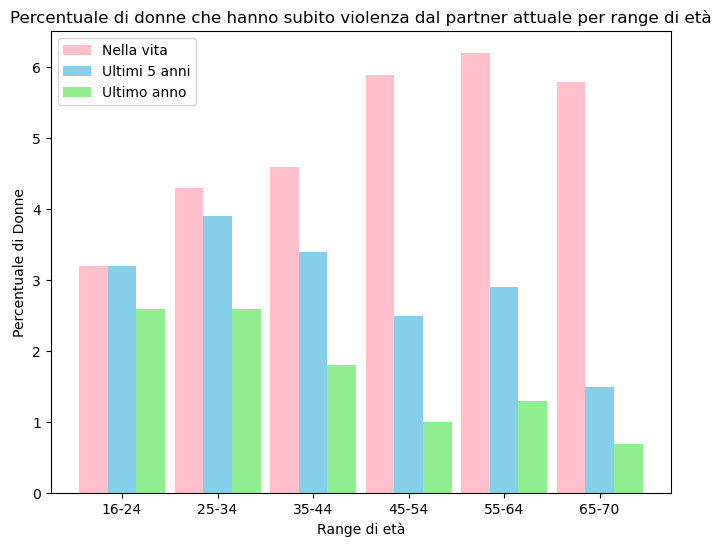

In [175]:
# larghezza delle barre
larghezza_barre = 0.3
# Posizioni delle barre
posizioni = np.arange(len(range_eta))
# Creazione del grafico a barre
plt.figure(figsize=(8, 6))

barre_totale = plt.bar(posizioni - larghezza_barre,nella_vita, larghezza_barre, label='Nella vita', color='pink')
barre_ultimi_5_anni = plt.bar(posizioni, ultimi5anni, larghezza_barre, label='Ultimi 5 anni', color='skyblue')
barre_ultimi_3_anni = plt.bar(posizioni + larghezza_barre, ultimoanno, larghezza_barre, label='Ultimo anno', color='lightgreen')

# Aggiungi titoli e etichette agli assi
plt.title('Percentuale di donne che hanno subito violenza dal partner attuale per range di età')
plt.xlabel('Range di età')
plt.ylabel('Percentuale di Donne')

# Etichette sull'asse delle ascisse
plt.xticks(posizioni, range_eta)

# Mostra la legenda
plt.legend()

# Visualizza il grafico
plt.show()

In [176]:
range_eta = ['16-24','25-34','35-44','45-54','55-64','65-70']
nella_vita = [15.7,19,20.2,22.4,16.8,10.1]
ultimi5anni = [13.5,7.8,4.3,2.3,1.3,0.4]
ultimoanno = [3,2.4,1.1,0.8,0.1,0.2]

dati = {
    'range eta' : range_eta,
    'Nella vita' : nella_vita,
    'Ultimi 5 anni anni': ultimi5anni,
    'Ultimo anno':ultimoanno
}
df = pd.DataFrame(dati)
print(df)

  range eta  Nella vita  Ultimi 5 anni anni  Ultimo anno
0     16-24        15.7                13.5          3.0
1     25-34        19.0                 7.8          2.4
2     35-44        20.2                 4.3          1.1
3     45-54        22.4                 2.3          0.8
4     55-64        16.8                 1.3          0.1
5     65-70        10.1                 0.4          0.2


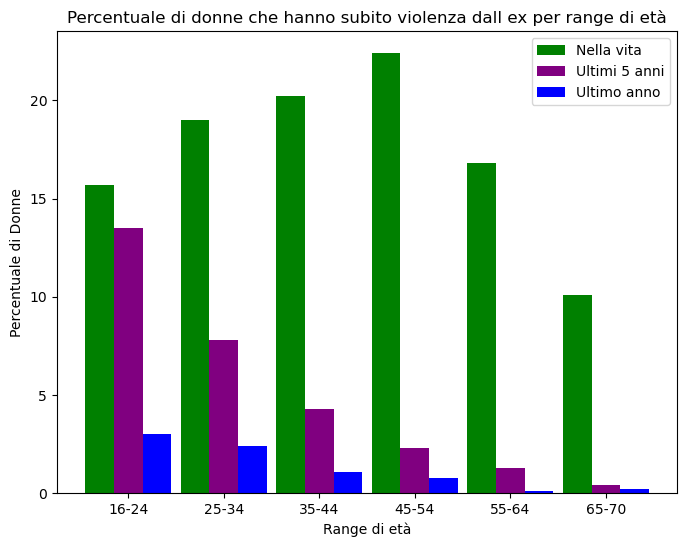

In [179]:
# larghezza delle barre
larghezza_barre = 0.3
# Posizioni delle barre
posizioni = np.arange(len(range_eta))
# Creazione del grafico a barre
plt.figure(figsize=(8, 6))

barre_totale = plt.bar(posizioni - larghezza_barre,nella_vita, larghezza_barre, label='Nella vita', color='green')
barre_ultimi_5_anni = plt.bar(posizioni, ultimi5anni, larghezza_barre, label='Ultimi 5 anni', color='purple')
barre_ultimi_3_anni = plt.bar(posizioni + larghezza_barre, ultimoanno, larghezza_barre, label='Ultimo anno', color='b')

# Aggiungi titoli e etichette agli assi
plt.title('Percentuale di donne che hanno subito violenza dall ex per range di età')
plt.xlabel('Range di età')
plt.ylabel('Percentuale di Donne')

# Etichette sull'asse delle ascisse
plt.xticks(posizioni, range_eta)

# Mostra la legenda
plt.legend()

# Visualizza il grafico
plt.show()

In [22]:
vittimeM = pd.read_excel('../../../uominiOmicidi2.xlsx')
vittimeM

,Unnamed: 0,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Partner (moglie, convivente, fidanzato/a)",10,17,25,20,11,15,20,13,12,9,7,7,11,9,6,7,5,10,5
1,"Ex partner (ex moglie, ex convivente, ex fidan...",0,0,1,1,0,2,2,3,2,1,1,1,0,1,1,1,0,1,0
2,Altro parente,27,30,25,35,44,47,41,35,45,49,38,35,53,38,33,29,34,46,39
3,Altro conoscente,0,0,8,15,7,18,24,38,28,45,32,31,37,43,20,21,23,16,23
4,Autore sconosciuto alla vittima,217,230,209,182,174,202,189,177,146,141,123,109,112,118,97,75,80,88,77
5,Autore non identificato,201,247,257,215,203,198,188,151,137,136,167,140,115,119,94,101,70,43,26


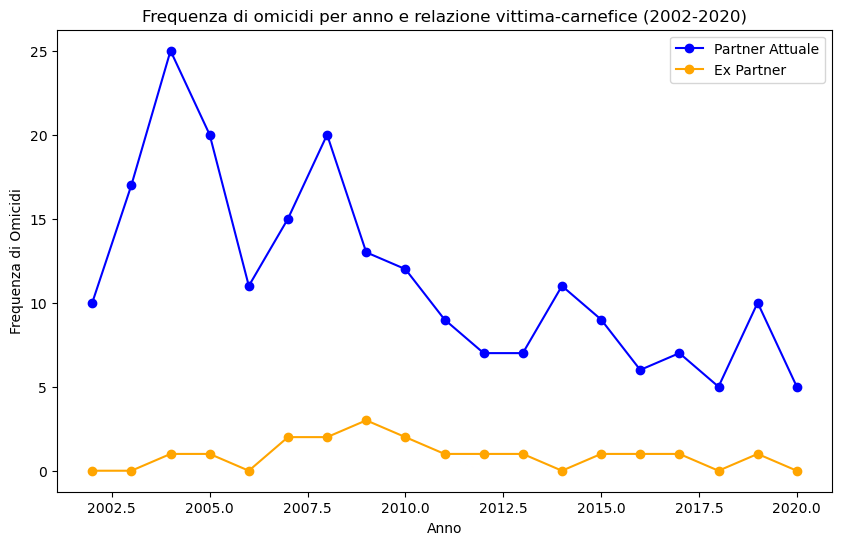

In [26]:
import matplotlib.pyplot as plt

# Dati forniti
anni = list(range(2002, 2021))
partner_attuale = [10, 17, 25, 20, 11, 15, 20, 13, 12, 9, 7, 7, 11, 9, 6, 7, 5, 10, 5]
ex_partner = [0, 0, 1, 1, 0, 2, 2, 3, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]

# Creazione del grafico a linee
plt.figure(figsize=(10, 6))

# Linee per il partner attuale
plt.plot(anni, partner_attuale, marker='o', label='Partner Attuale', color='blue')

# Linee per l'ex partner
plt.plot(anni, ex_partner, marker='o', label='Ex Partner', color='orange')

# Aggiungi titoli e etichette agli assi
plt.title('Frequenza di omicidi per anno e relazione vittima-carnefice (2002-2020)')
plt.xlabel('Anno')
plt.ylabel('Frequenza di Omicidi')

# Mostra la legenda
plt.legend()

# Visualizza il grafico
plt.show()


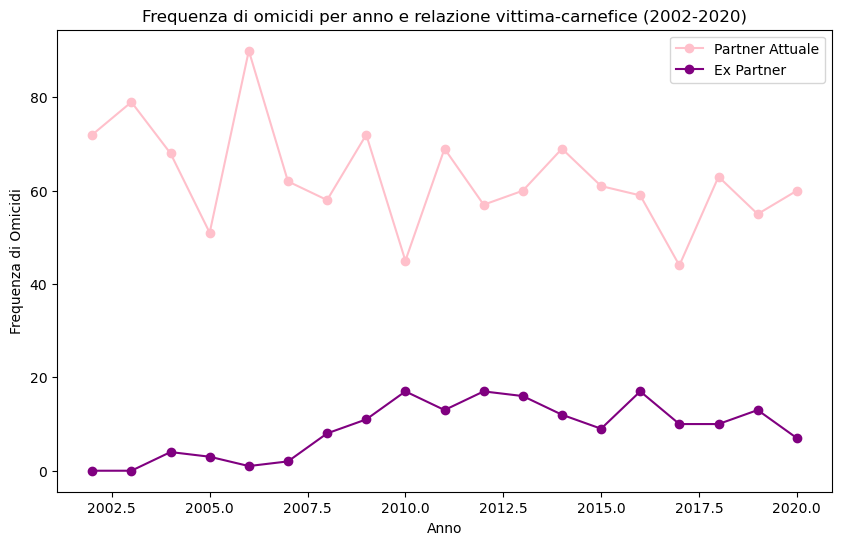

In [23]:
import matplotlib.pyplot as plt

# Dati forniti
anni = list(range(2002, 2021))
partner_attuale = [72,79,68,51,90,62,58,72,45,69,57,60,69,61,59,44,63,55,60]
ex_partner = [0,0,4,3,1,2,8,11,17,13,17,16,12,9,17,10,10,13,7]

# Creazione del grafico a linee
plt.figure(figsize=(10, 6))

# Linee per il partner attuale
plt.plot(anni, partner_attuale, marker='o', label='Partner Attuale', color='pink')

# Linee per l'ex partner
plt.plot(anni, ex_partner, marker='o', label='Ex Partner', color='purple')

# Aggiungi titoli e etichette agli assi
plt.title('Frequenza di omicidi per anno e relazione vittima-carnefice (2002-2020)')
plt.xlabel('Anno')
plt.ylabel('Frequenza di Omicidi')

# Mostra la legenda
plt.legend()

# Visualizza il grafico
plt.show()


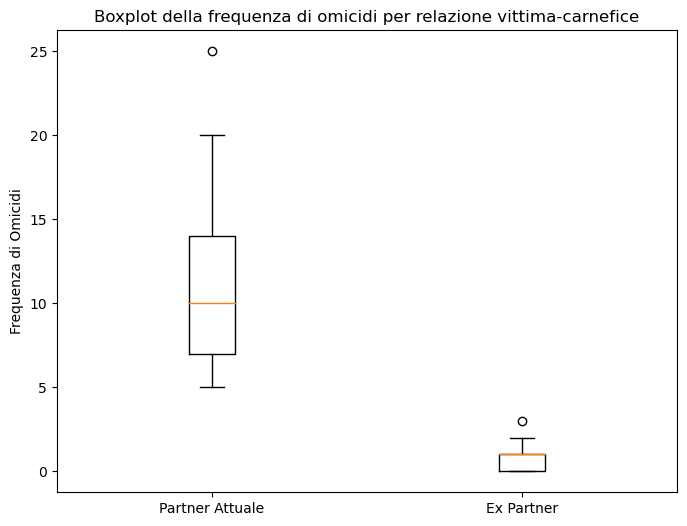

In [24]:
import matplotlib.pyplot as plt

# Dati forniti
partner_attuale = [10, 17, 25, 20, 11, 15, 20, 13, 12, 9, 7, 7, 11, 9, 6, 7, 5, 10, 5]
ex_partner = [0, 0, 1, 1, 0, 2, 2, 3, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]

# Creazione del boxplot
plt.figure(figsize=(8, 6))

plt.boxplot([partner_attuale, ex_partner], labels=['Partner Attuale', 'Ex Partner'])

# Aggiungi titoli e etichette agli assi
plt.title('Boxplot della frequenza di omicidi per relazione vittima-carnefice')
plt.ylabel('Frequenza di Omicidi')

# Visualizza il boxplot
plt.show()


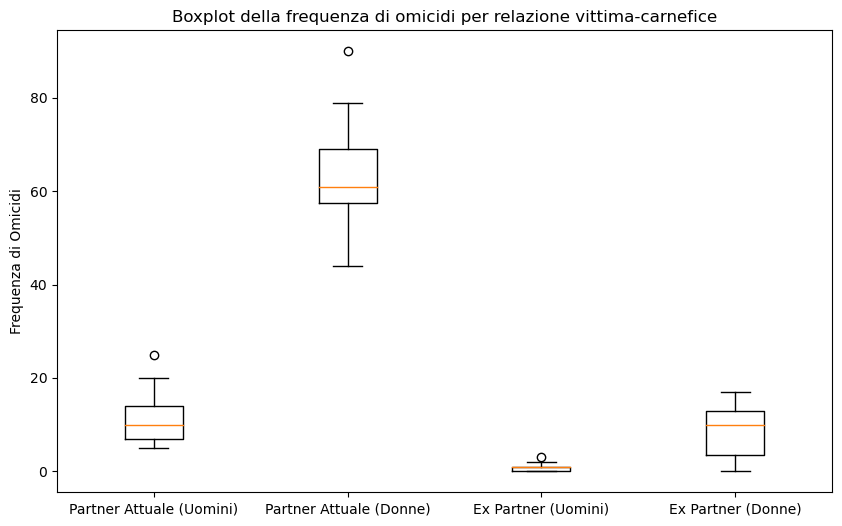

In [27]:
import matplotlib.pyplot as plt

# Dati forniti
partner_attuale_uomini = [10, 17, 25, 20, 11, 15, 20, 13, 12, 9, 7, 7, 11, 9, 6, 7, 5, 10, 5]
ex_partner_uomini = [0, 0, 1, 1, 0, 2, 2, 3, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]

partner_attuale_donne = [72, 79, 68, 51, 90, 62, 58, 72, 45, 69, 57, 60, 69, 61, 59, 44, 63, 55, 60]
ex_partner_donne = [0, 0, 4, 3, 1, 2, 8, 11, 17, 13, 17, 16, 12, 9, 17, 10, 10, 13, 7]

# Creazione dei boxplot
plt.figure(figsize=(10, 6))

# Boxplot per uomini
plt.boxplot([partner_attuale_uomini, ex_partner_uomini], positions=[1, 3], labels=['Partner Attuale (Uomini)', 'Ex Partner (Uomini)'])

# Boxplot per donne
plt.boxplot([partner_attuale_donne, ex_partner_donne], positions=[2, 4], labels=['Partner Attuale (Donne)', 'Ex Partner (Donne)'])

# Aggiungi titoli e etichette agli assi
plt.title('Boxplot della frequenza di omicidi per relazione vittima-carnefice')
plt.ylabel('Frequenza di Omicidi')

# Visualizza i boxplot
plt.show()
